In [1]:
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#from generator import DataGenerator
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
!tar -xf /content/drive/MyDrive/OCT2017.tar.gz

In [4]:
# Model parameters
image_size = 224
batch_size = 32
num_classes = 4
epochs = 10

In [5]:
import os
labels = os.listdir('/content/OCT2017/train')
print(labels)

['DME', 'CNV', 'DRUSEN', 'NORMAL']


In [6]:
train_datagen = ImageDataGenerator(validation_split=0.2, rescale = 1./255) # set validation split

train_generator = train_datagen.flow_from_directory('/content/OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('/content/OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory("/content//OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [7]:
valid_X, valid_Y = next(validation_generator)
# creating test data
test_X, test_Y = next(test_generator)

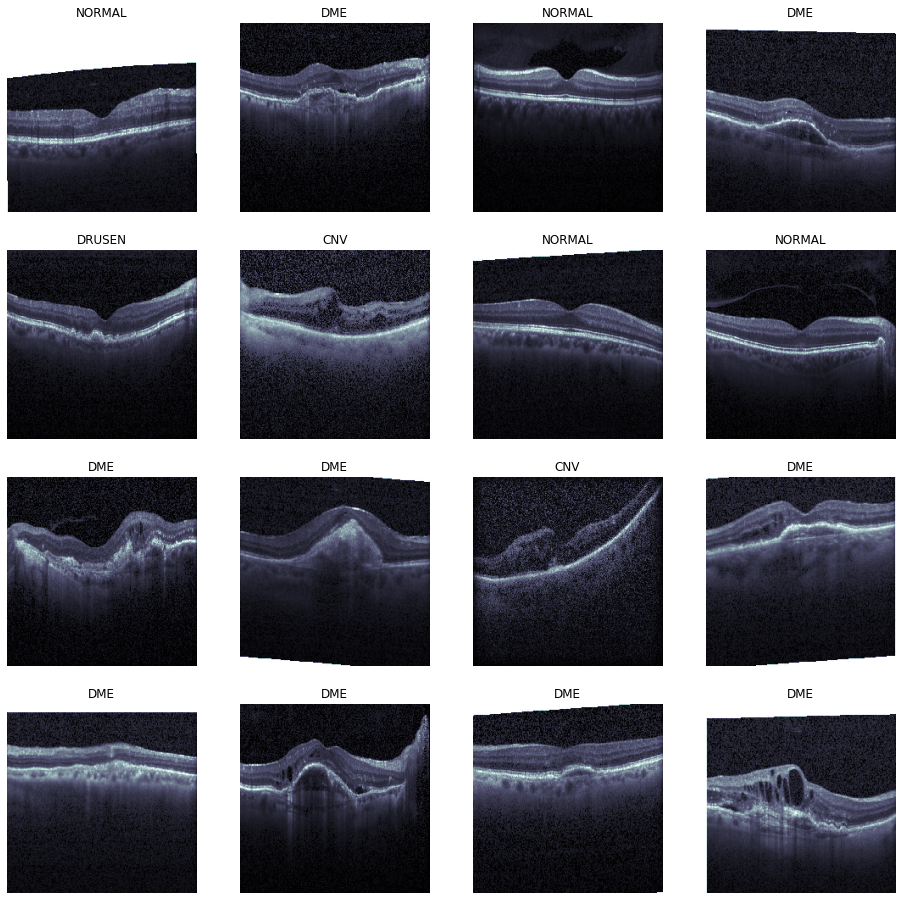

In [8]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

Model

In [9]:
# defining inceptionnet model
def inception_v3():
    img_in = Input(t_x.shape[1:])              #input of model 
    model =  InceptionV3(include_top= False , # remove  the 3 fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= t_x.shape[1:],
                pooling ='avg')
    x = model.output  
    predictions = Dense(4, activation="softmax", name="predictions")(x)    # fuly connected layer for predict class 
    model = Model(inputs=img_in, outputs=predictions)
    return model

In [10]:
# compiling model
model = inception_v3()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

87924736/87910968 [==============================] - 0s 0us/step


In [11]:
# training model
history = model.fit_generator(train_generator, 
                                  steps_per_epoch=100,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
100/100 [==============================] - 43s 249ms/step - loss: 0.5284 - accuracy: 0.8194 - val_loss: 110.1805 - val_accuracy: 0.4375
Epoch 2/10
100/100 [==============================] - 25s 243ms/step - loss: 0.3181 - accuracy: 0.8972 - val_loss: 1.2301 - val_accuracy: 0.7500
Epoch 3/10
100/100 [==============================] - 25s 250ms/step - loss: 0.2955 - accuracy: 0.9069 - val_loss: 0.3072 - val_accuracy: 0.9375
Epoch 4/10
100/100 [==============================] - 26s 259ms/step - loss: 0.2542 - accuracy: 0.9122 - val_loss: 1.3736 - val_accuracy: 0.5625
Epoch 5/10
100/100 [==============================] - 26s 256ms/step - loss: 0.2383 - accuracy: 0.9222 - val_loss: 1.5383 - val_accuracy: 0.5938
Epoch 6/10
100/100 [==============================] - 26s 258ms/step - loss: 0.2227 - accuracy: 0.9278 - val_loss: 0.0625 - val_accuracy: 0.9688
Epoch 7/10
100/100 [==============================] - 26s 256ms/step - loss: 0.2169 - accuracy: 0.9309 - val_loss: 0.3984 - val_

In [12]:
#save model

model.save("/content/drive/MyDrive/InceptionNet2.hdf5")

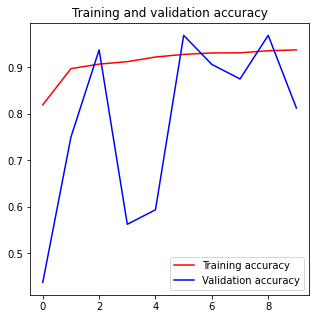

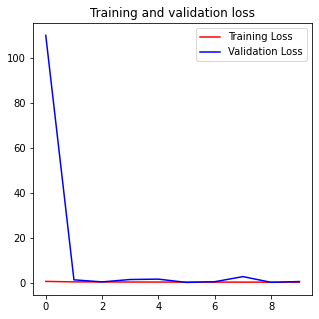

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(5,5))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (5,5))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Making Predicions

In [14]:
# predicting y value
y_pred = model.predict(test_X)

In [15]:
import numpy as np
pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

actual_class = []
for i in range(len(test_Y)):
    actual_class.append(np.argmax(test_Y[i]))

# accuracy score
print('accuracy_score = ',accuracy_score(pred_class,actual_class))

accuracy_score =  0.9375


In [16]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // 100) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.





Test Loss: 0.1963847130537033
Test accuracy: 0.9156249761581421


In [22]:
pred_datagen = ImageDataGenerator(rescale = 1./255)

pred_generator = pred_datagen.flow_from_directory("/content/OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)  

Found 1000 images belonging to 4 classes.


In [23]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[206  44   0   0]
 [  0 249   0   1]
 [ 12   0 238   0]
 [  0  23   3 224]]


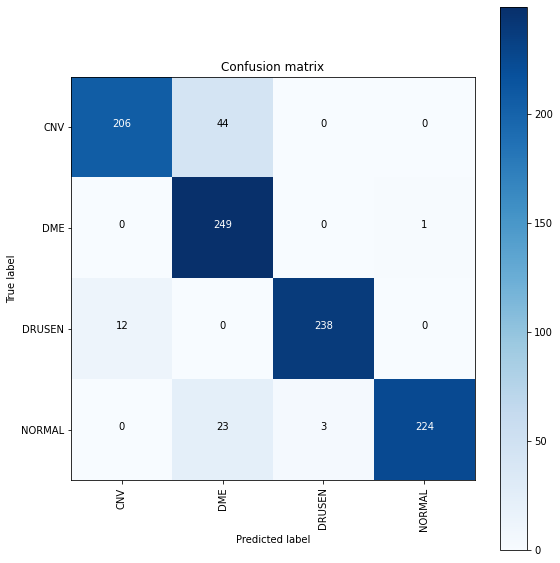

In [25]:
# confusion matrix
import itertools
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.94      0.82      0.88       250
         DME       0.79      1.00      0.88       250
      DRUSEN       0.99      0.95      0.97       250
      Normal       1.00      0.90      0.94       250

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

